# Importing modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading Dataset

In [2]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [3]:
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

# Dataset Descrepiton

In [4]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# Creating Dataframe

In [5]:
df=pd.DataFrame(data=boston_dataset['data'],columns=boston_dataset.feature_names)

In [6]:
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [7]:
df['MEDV']=boston_dataset.target

# Understing Data

In [8]:
df.axes

[RangeIndex(start=0, stop=506, step=1),
 Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
        'PTRATIO', 'B', 'LSTAT', 'MEDV'],
       dtype='object')]

In [9]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [10]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [11]:
# for i in df.columns:
#     print(df[i].value_counts())

# Plotting data

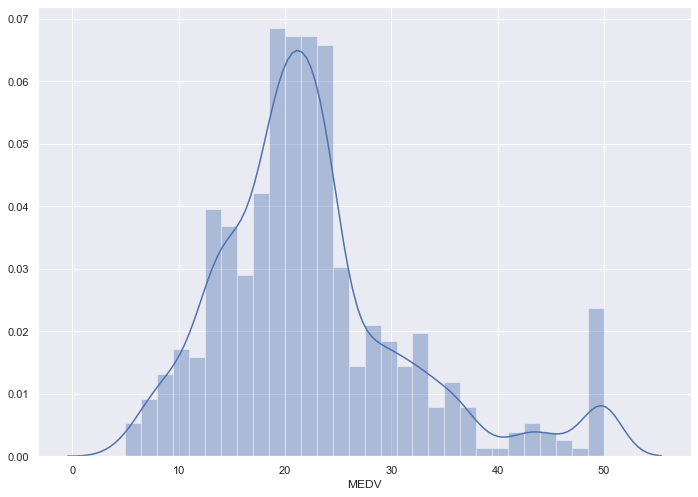

In [12]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

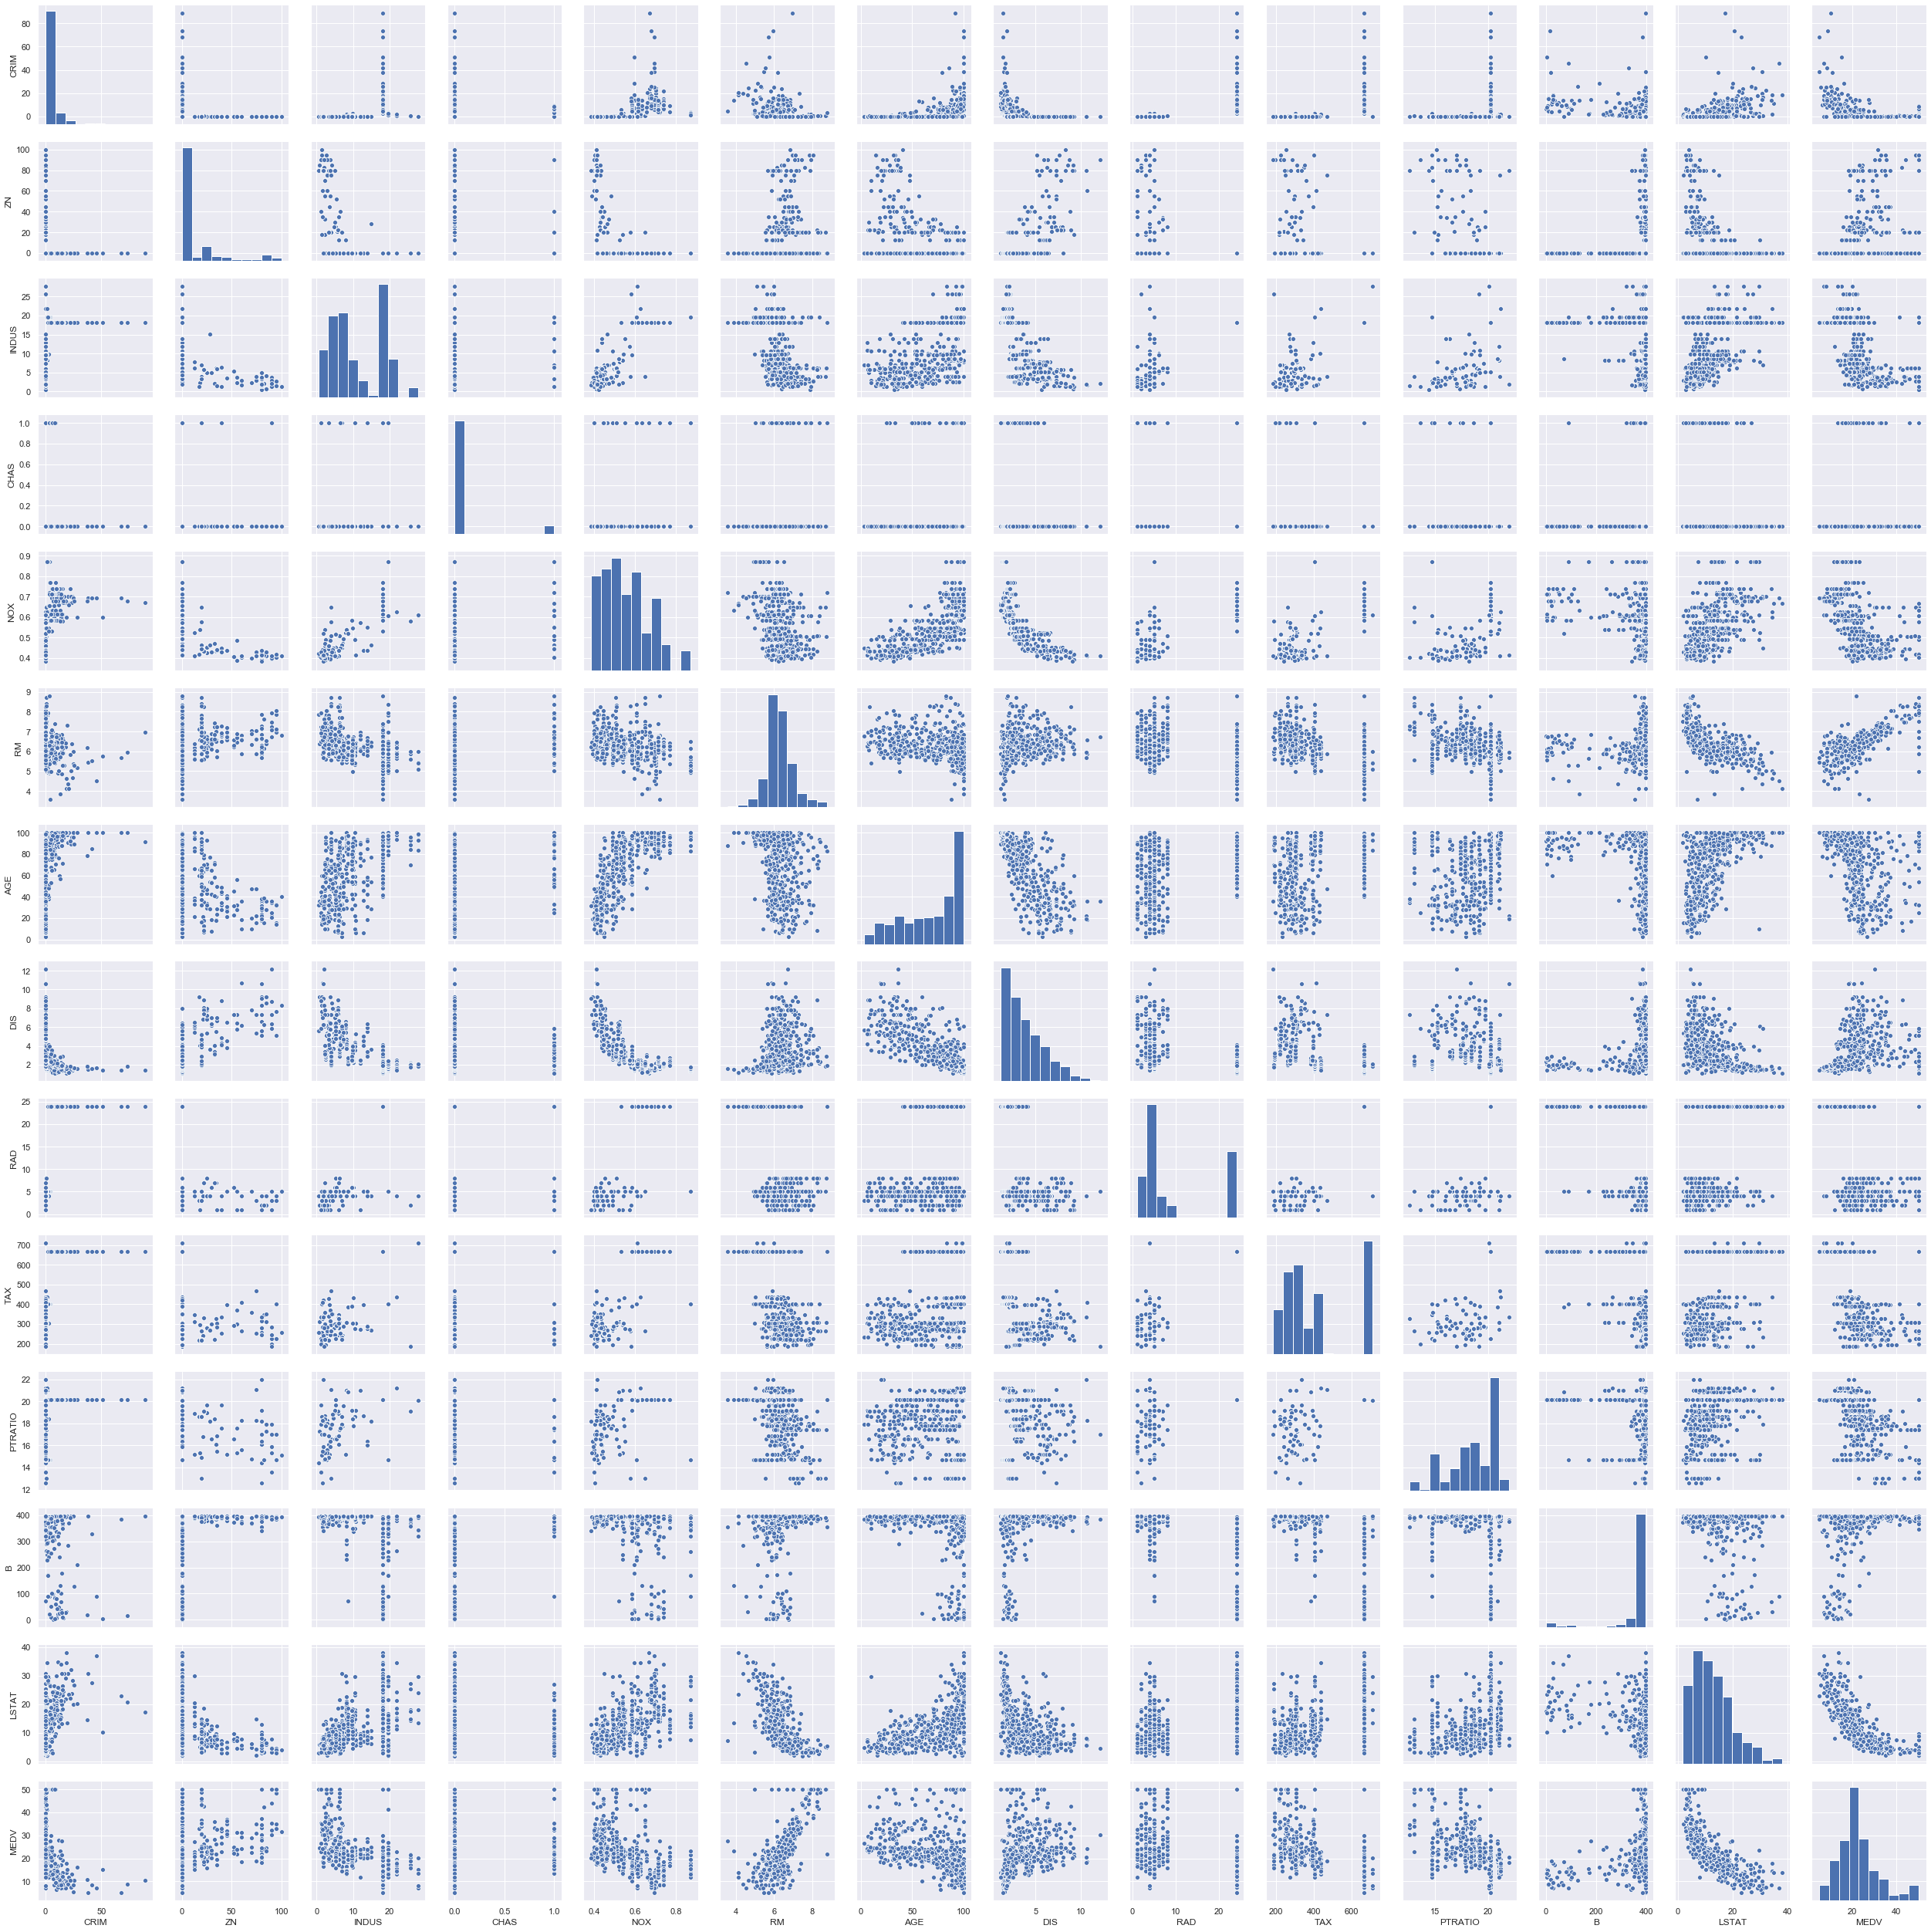

In [13]:
sns.pairplot(df)

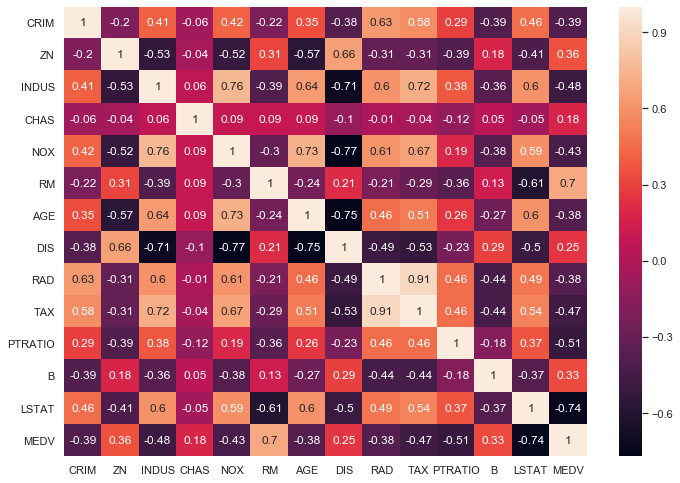

In [14]:
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

# Identifying multicolinearity

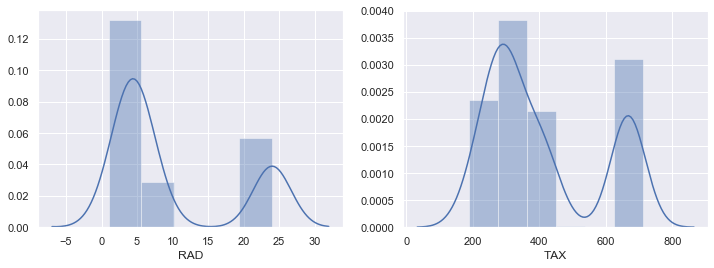

In [15]:
sns.set(rc={'figure.figsize':(12,4)})
plt.subplot(1,2,1)
sns.distplot(df.RAD)
plt.subplot(1,2,2)
sns.distplot(df.TAX)

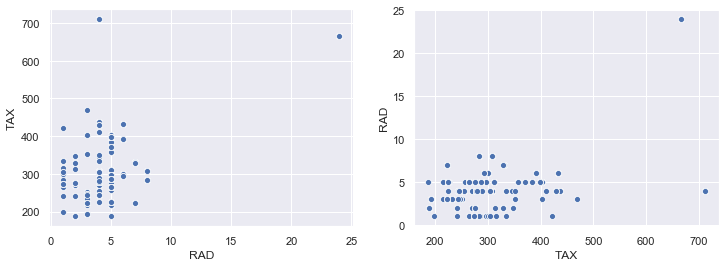

In [16]:
plt.subplot(1,2,1)
sns.scatterplot(df.RAD,df.TAX)
plt.subplot(1,2,2)
sns.scatterplot(df.TAX,df.RAD)

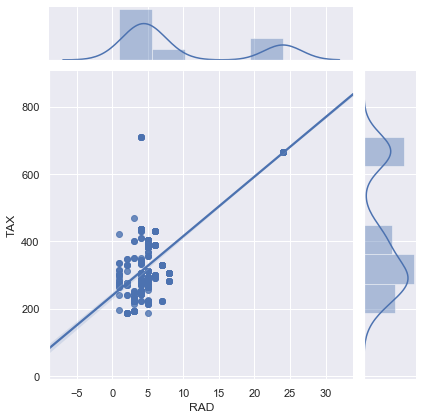

In [17]:
sns.jointplot("RAD", "TAX", data=df, kind="reg")

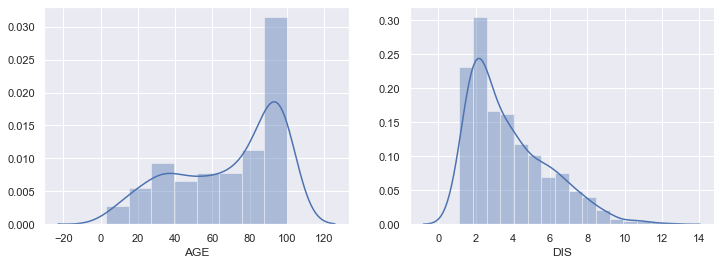

In [18]:
sns.set(rc={'figure.figsize':(12,4)})
plt.subplot(1,2,1)
sns.distplot(df.AGE)
plt.subplot(1,2,2)
sns.distplot(df.DIS)

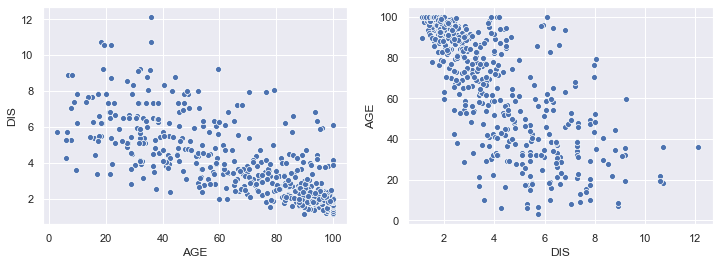

In [19]:
plt.subplot(1,2,1)
sns.scatterplot(df.AGE,df.DIS)
plt.subplot(1,2,2)
sns.scatterplot(df.DIS,df.AGE)

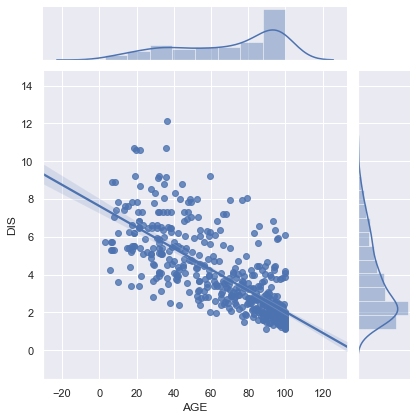

In [20]:
sns.jointplot("AGE", "DIS", data=df, kind="reg")

### Pair of AGE,DIS and pair of RAD,TEX have multicolinearity
### So if we decide to include them into our model we should choose only one from each pair

# Creating x and y

In [21]:
x=df[['LSTAT','RM']]
y=df.MEDV

In [22]:
import statsmodels.api as sm

In [23]:
x=sm.add_constant(x)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state=5)

# Creating Model

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score

In [26]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Evaluating Model

In [27]:
y_pred = model.predict(x_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)
acc=model.score(x_test,y_test)
print(f'RMSE = {rmse}')
print(f'R2 = {r2}')
print(f'Accuracy = {acc}')

RMSE = 5.137400784702913
R2 = 0.662899697518695
Accuracy = 0.662899697518695
